In [1]:
import datetime
import IPython.display
import numpy as np
from pandas import Series,DataFrame
%matplotlib inline 
import matplotlib.pyplot as plt #描画ライブラリ
import pandas_datareader as web #データのダウンロードライブラリ
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
start = datetime.datetime(2009,1,1)
end = datetime.datetime(2019,12,30)
df_vym= web.DataReader('VYM','yahoo',start,end)
df_vti= web.DataReader('VTI','yahoo',start,end)
df_hdv = web.DataReader('HDV','yahoo',start,end)
df_vea = web.DataReader('VEA','yahoo',start,end)
df_vwo = web.DataReader('VWO','yahoo',start,end)
df_spyd = web.DataReader('SPYD','yahoo',start,end)

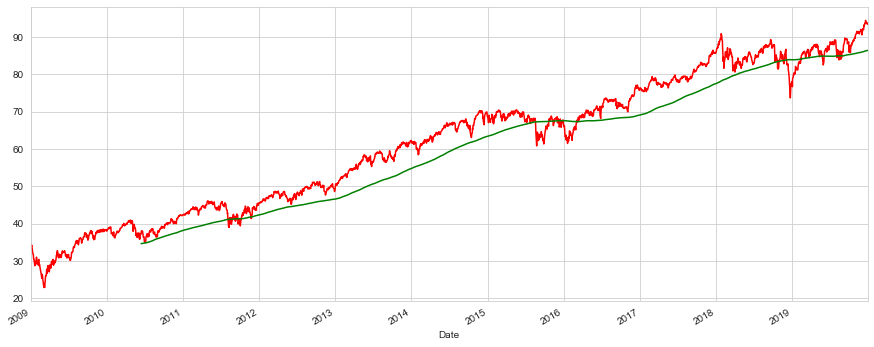

In [3]:
df_vym['SMA'] = df_vym['Close'].rolling(window=365).mean()
df_vym['Close'].plot(figsize=(15,6),color='red')
df_vym['SMA'].plot(figsize=(15,6),color='green')
plt.show()


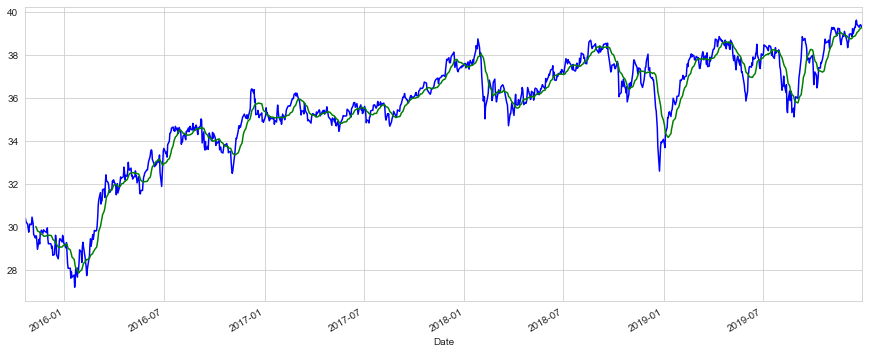

In [4]:
df_spyd['SMA'] = df_spyd['Close'].rolling(window=14).mean()
df_spyd['Close'].plot(figsize=(15,6),color='blue')
df_spyd['SMA'].plot(figsize=(15,6),color='green')
plt.show()

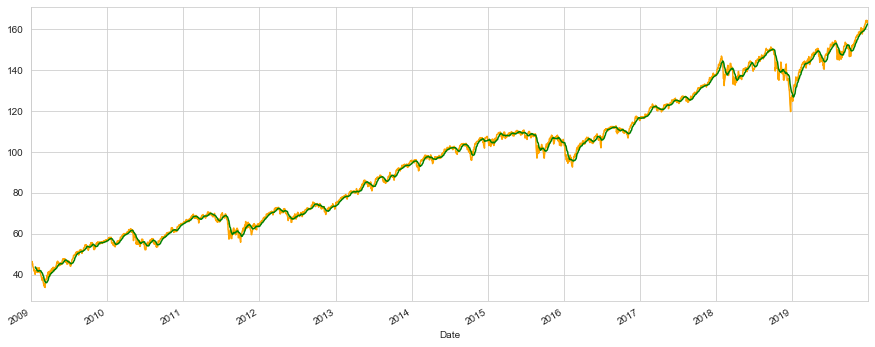

In [5]:
df_vti['SMA'] = df_vti['Close'].rolling(window=14).mean()
df_vti['Close'].plot(figsize=(15,6),color='orange')
df_vti['SMA'].plot(figsize=(15,6),color='green')
plt.show()

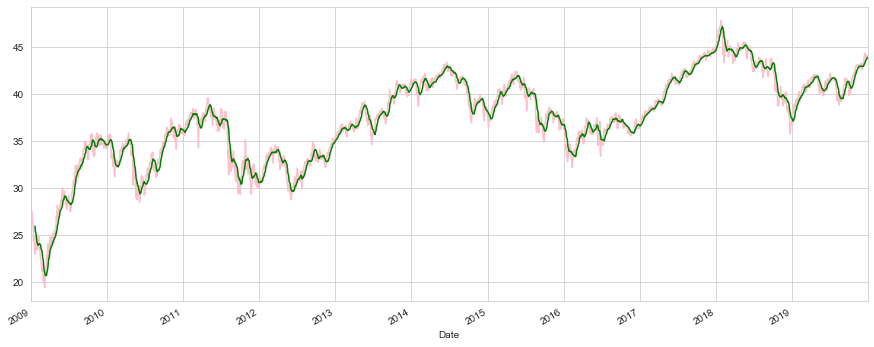

In [6]:
df_vea['SMA'] = df_vea['Close'].rolling(window=14).mean()
df_vea['Close'].plot(figsize=(15,6),color='pink')
df_vea['SMA'].plot(figsize=(15,6),color='green')
plt.show()

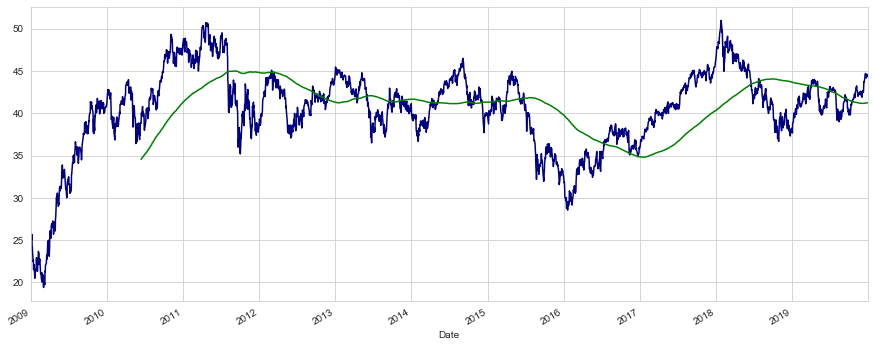

In [7]:
df_vwo['SMA'] = df_vwo['Close'].rolling(window=365).mean()
df_vwo['Close'].plot(figsize=(15,6),color='navy')
df_vwo['SMA'].plot(figsize=(15,6),color='green')
plt.show()

In [8]:
closing_df = web.DataReader(['VYM','VTI','SPYD','VEA','VWO'],'yahoo',start,end)['Close']

In [9]:
tech_rets = closing_df.pct_change()

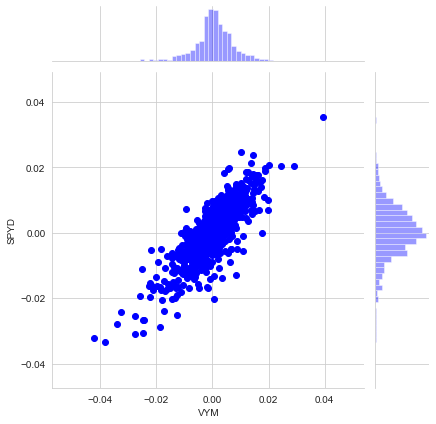

In [10]:
sns.jointplot('VYM','SPYD',tech_rets,kind='scatter',color='BLUE')

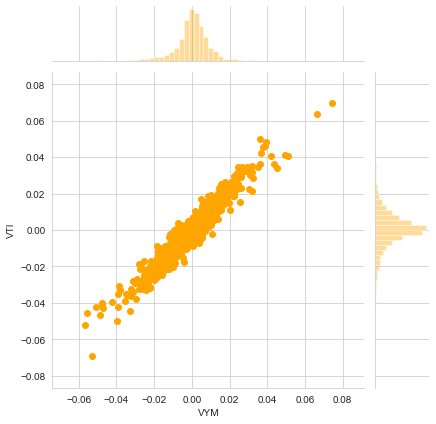

In [11]:
sns.jointplot('VYM','VTI',tech_rets,kind='scatter',color='ORANGE')

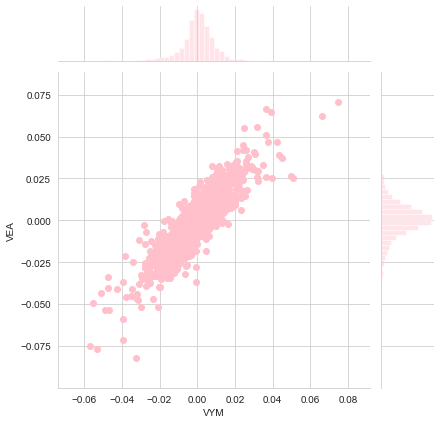

In [12]:
sns.jointplot('VYM','VEA',tech_rets,kind='scatter',color='PINK')

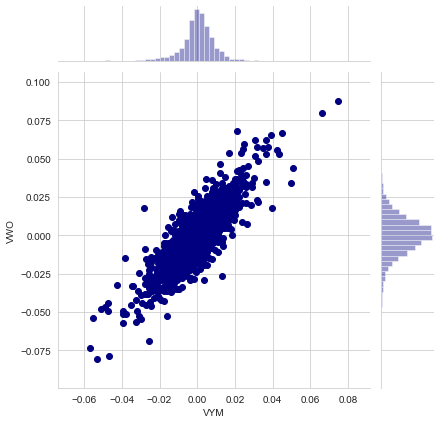

In [13]:
sns.jointplot('VYM','VWO',tech_rets,kind='scatter',color='NAVY')

In [14]:
closing_df = web.DataReader(['VYM','VTI','SPYD','VEA','VWO','XLP','VGLT','AGG','BND'],'yahoo',start,end)['Close']

In [15]:
tech_rets = closing_df.pct_change()

(9, 0)

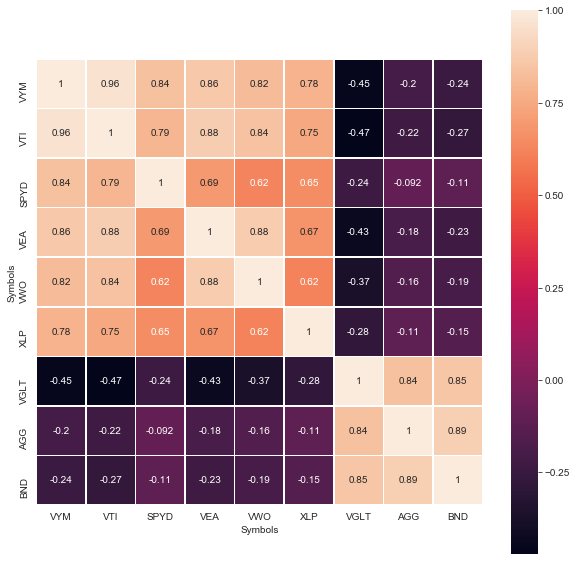

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(tech_rets.corr(),annot=True, linewidths=.5, ax=ax, square=True)
ax.set_ylim(len(tech_rets.corr()), 0)